## 1) Data collection and loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading eeg data from csv file to a dataframe called "eeg_data"
eeg_data = pd.read_csv("EEG_data.csv")
eeg_data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [3]:
# demographic_info.csv dataset is loaded into dataframe called "demogrphic_data"
demographic_data = pd.read_csv("demographic_info.csv")
demographic_data.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


## 2) Data exploration

In [4]:
eeg_data.shape # eeg_data contains (12811 rows, 15 columns)

(12811, 15)

In [5]:
eeg_data.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln'],
      dtype='object')

In [6]:
demographic_data.columns

Index(['subject ID', ' age', ' ethnicity', ' gender'], dtype='object')

In [7]:
demographic_data.shape # demographic data contains (10 rows and 4 columns)

(10, 4)

In [8]:
# Renaming the column "subject ID" to "Subject ID"
demographic_data.rename(columns={"subject ID": "SubjectID"},inplace=True)

In [9]:
demographic_data

,SubjectID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


### Merging eeg_data and demographic_info data using inner join on Column "SubjectID"

In [46]:
merged_data_before = pd.merge(eeg_data,demographic_data,how="inner",on="SubjectID")
merged_data_before.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [47]:
# Renaming columns
merged_data_before.rename(columns={" gender":"Gender"," ethnicity": "Ethnicity"," age":"Age"},inplace=True)

In [48]:
merged_data_before["Ethnicity"]

0        Han Chinese
1        Han Chinese
2        Han Chinese
3        Han Chinese
4        Han Chinese
            ...     
12806    Han Chinese
12807    Han Chinese
12808    Han Chinese
12809    Han Chinese
12810    Han Chinese
Name: Ethnicity, Length: 12811, dtype: object

In [49]:
merged_data_before["Gender"]

0        M
1        M
2        M
3        M
4        M
        ..
12806    F
12807    F
12808    F
12809    F
12810    F
Name: Gender, Length: 12811, dtype: object

In [50]:
merged_data_before.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity,Gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [51]:
# Total rows, columns
merged_data_before.shape

(12811, 18)

## 3) Feature transformation

### Converting non numerical values into numerical values => Feature encoding

In [52]:
merged_data_before["Gender"].dtype , merged_data_before["Ethnicity"].dtype

(dtype('O'), dtype('O'))

In [53]:
# Gender and Ethnicity are non numerical (categorical features)
merged_data = pd.get_dummies(merged_data_before)
merged_data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


### Search for NaN values in all columns, if present Impute them => Imputation

In [54]:
merged_data.isna().sum()

SubjectID                0
VideoID                  0
Attention                0
Mediation                0
Raw                      0
Delta                    0
Theta                    0
Alpha1                   0
Alpha2                   0
Beta1                    0
Beta2                    0
Gamma1                   0
Gamma2                   0
predefinedlabel          0
user-definedlabeln       0
Age                      0
Ethnicity_Bengali        0
Ethnicity_English        0
Ethnicity_Han Chinese    0
Gender_F                 0
Gender_M                 0
dtype: int64

👆 From this we infer that there are no NaN values in our dataset

### Feature Scaling - yet to be completed

In [19]:
eeg_data.predefinedlabel.value_counts()

0.0    6662
1.0    6149
Name: predefinedlabel, dtype: int64

In [20]:
eeg_data["user-definedlabeln"].value_counts()

1.0    6567
0.0    6244
Name: user-definedlabeln, dtype: int64

After each session, the student rated his/her confusion level on a scale of 1-7, where one corresponded to the least confusing and seven corresponded to the most confusing. 
These labels if further normalized into labels of whether the students are confused or not. 
This label is offered as self-labelled confusion in addition to our predefined label of confusion.

# Exploratory Data Analysis

In [21]:
# Description of non-numerical columns

merged_data.describe()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,...,1.281100e+04,1.281100e+04,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,...,2.959255e+04,1.441597e+04,0.479978,0.512606,25.409960,0.101085,0.100226,0.798689,0.200999,0.799001
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,...,7.982637e+04,3.603523e+04,0.499618,0.499861,2.205148,0.301453,0.300313,0.400996,0.400763,0.400763
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,...,1.000000e+00,2.000000e+00,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,...,4.058000e+03,2.167500e+03,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,...,9.763000e+03,5.116000e+03,0.000000,1.000000,25.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,...,2.488800e+04,1.266950e+04,1.000000,1.000000,25.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,...,1.972506e+06,1.348117e+06,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SubjectID              12811 non-null  float64
 1   VideoID                12811 non-null  float64
 2   Attention              12811 non-null  float64
 3   Mediation              12811 non-null  float64
 4   Raw                    12811 non-null  float64
 5   Delta                  12811 non-null  float64
 6   Theta                  12811 non-null  float64
 7   Alpha1                 12811 non-null  float64
 8   Alpha2                 12811 non-null  float64
 9   Beta1                  12811 non-null  float64
 10  Beta2                  12811 non-null  float64
 11  Gamma1                 12811 non-null  float64
 12  Gamma2                 12811 non-null  float64
 13  predefinedlabel        12811 non-null  float64
 14  user-definedlabeln     12811 non-null  float64
 15  Ag

In [23]:
attention_greater_0 = merged_data[merged_data["Attention"]  > 0.0]
attention_greater_0.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


In [24]:
attention_greater_0.shape  #rows reduced from 12811 to 11388 after applying "Attention > 0.0"

(11388, 21)

## UNIVARIATE ANALYSIS

### Univariate analysis using Histogram

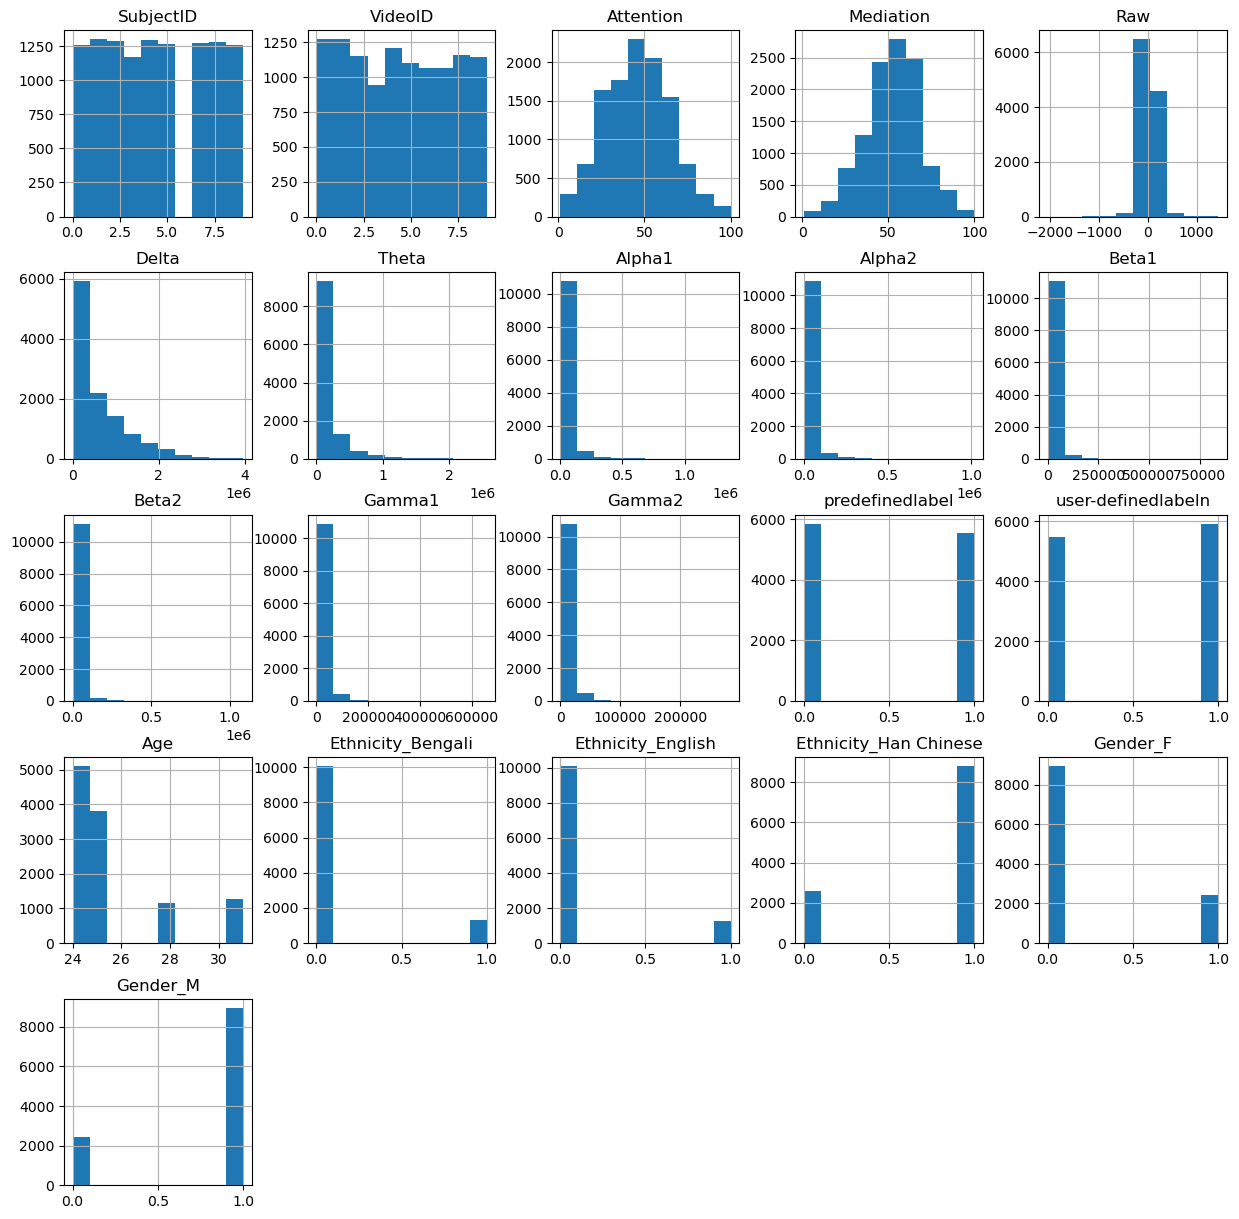

<Figure size 640x480 with 0 Axes>

In [25]:
attention_greater_0.hist(figsize=(15,15));
plt.show();
plt.tight_layout();

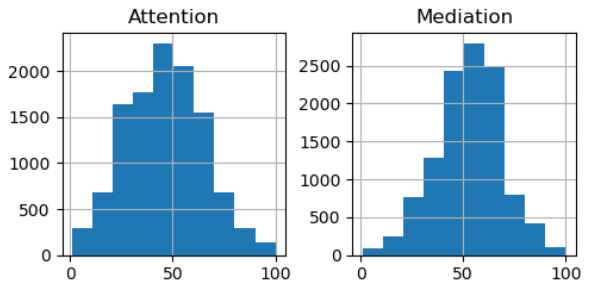

##### From the histogram generated for all columms it is clear that,
#####  `Attention` and `Meditation` follows a `Normal distribution` since they form a bell shaped curve

### Univariate analysis using box plot

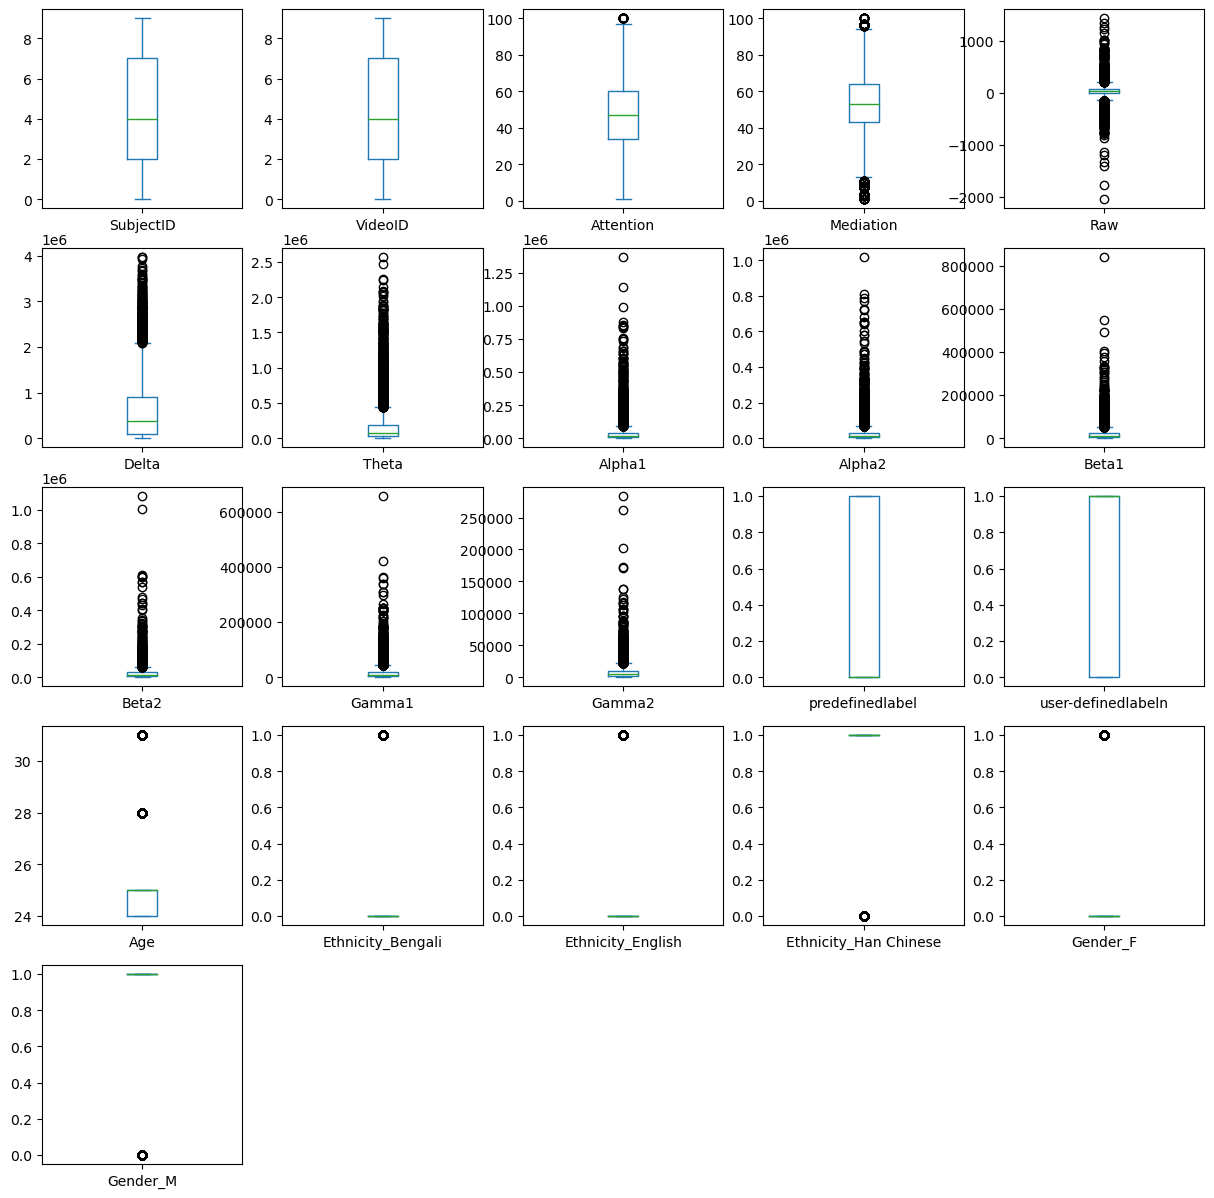

In [26]:
attention_greater_0.plot(kind='box',figsize=(15,15),subplots=True,layout=(5,5))
plt.show()

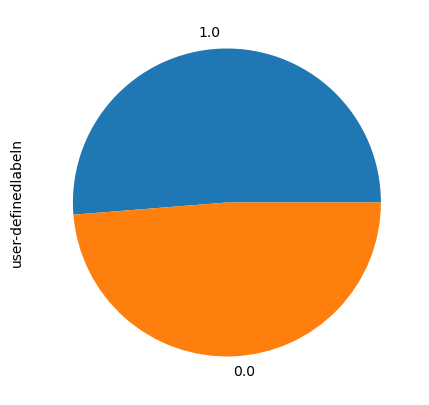

In [27]:
plt.figure(figsize=(5,5))
merged_data["user-definedlabeln"].value_counts().plot(kind='pie')
plt.show();

## MULTIVARIATE ANALYSIS

* establish a sense of relationship of all variables with one another

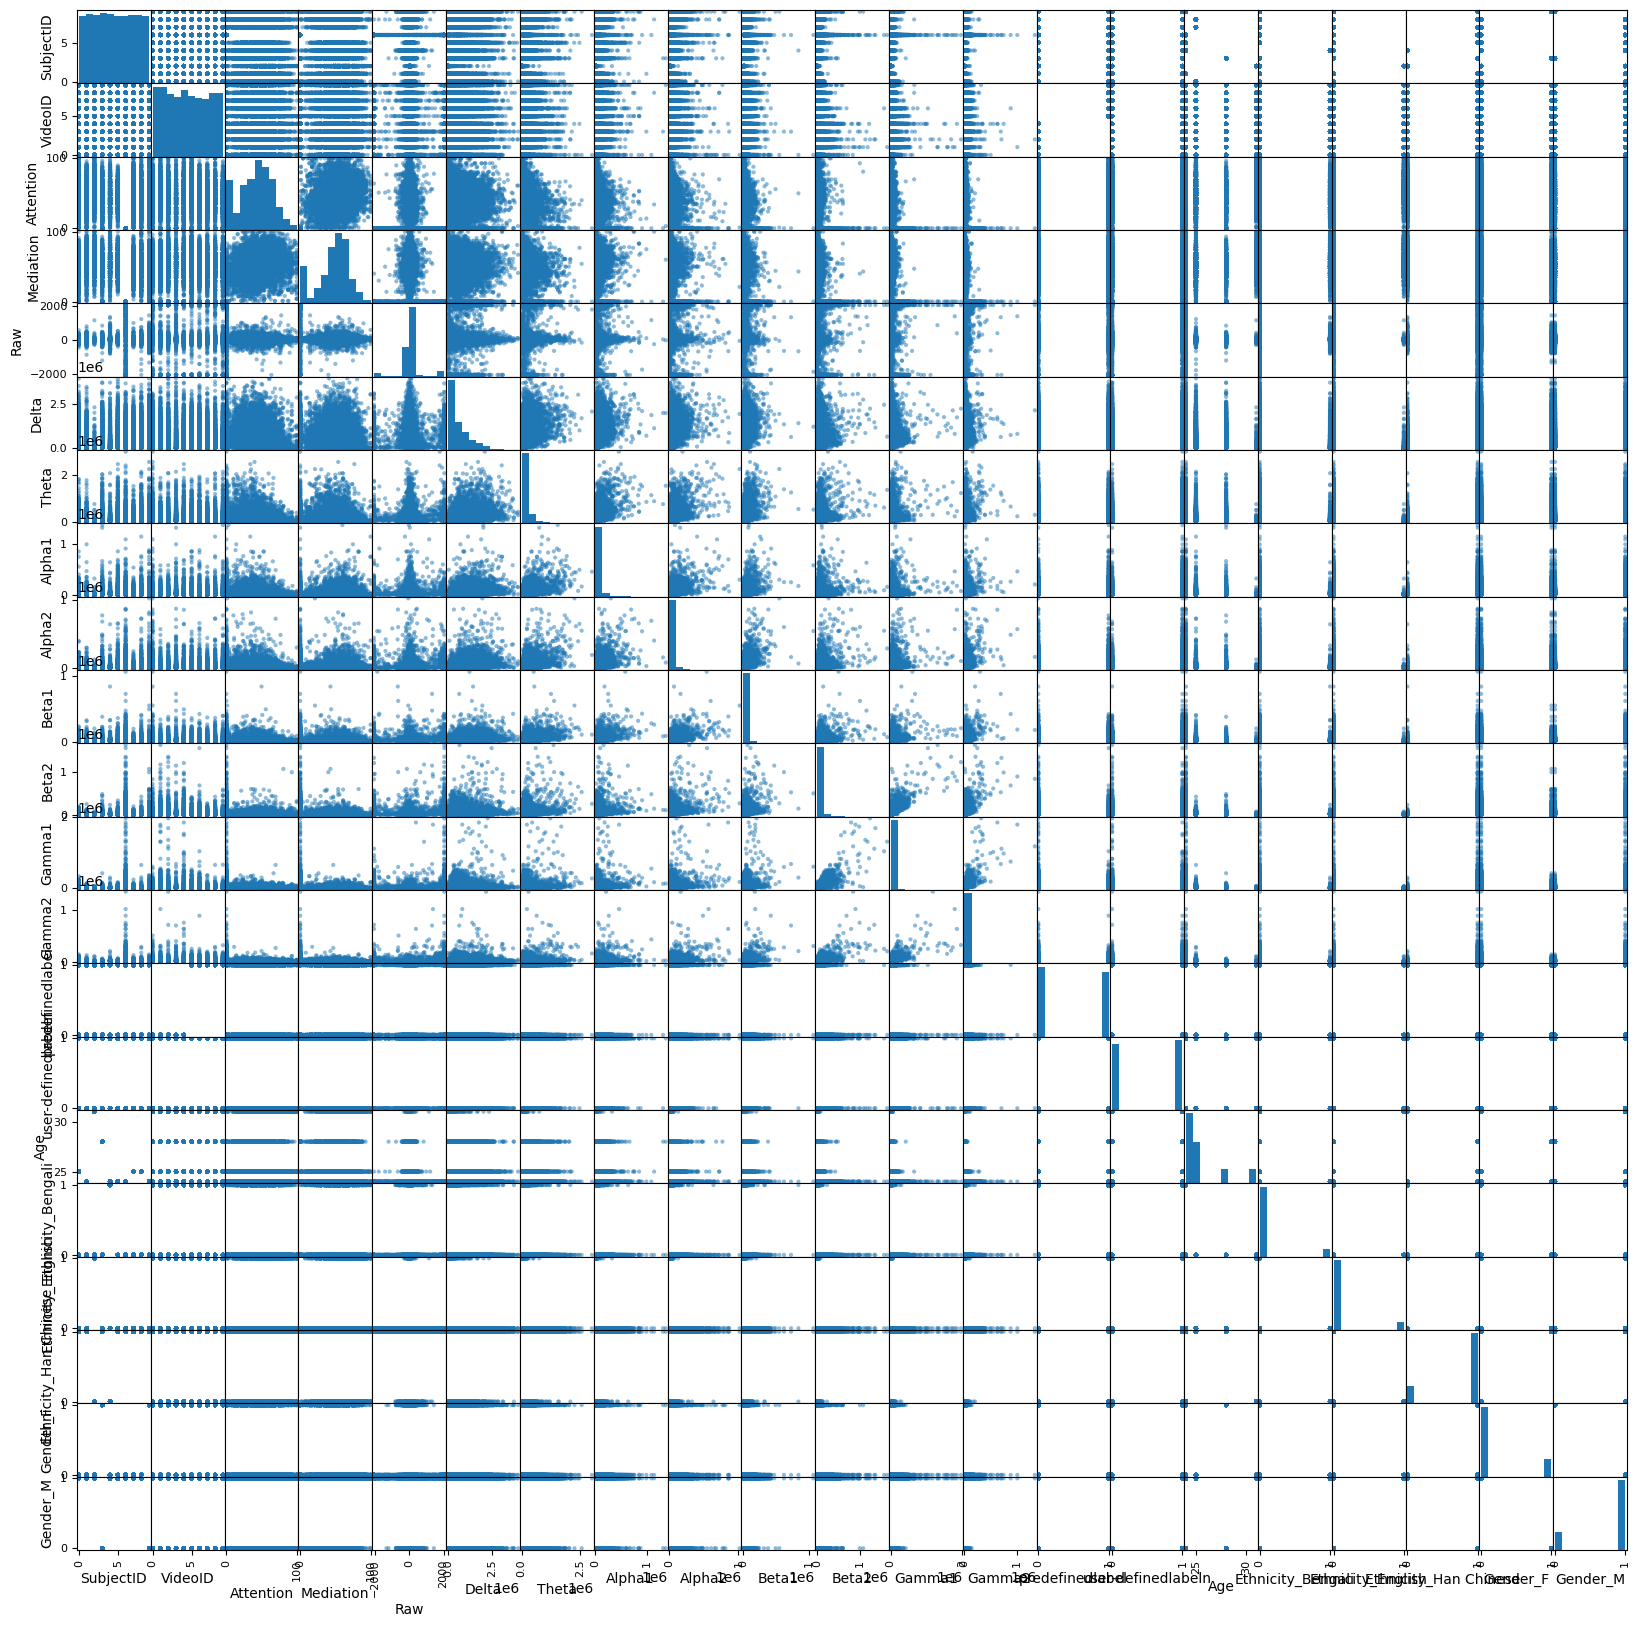

In [28]:
pd.plotting.scatter_matrix(merged_data,figsize=(20,20));

## Correlation matrix

In [29]:
import seaborn as sns

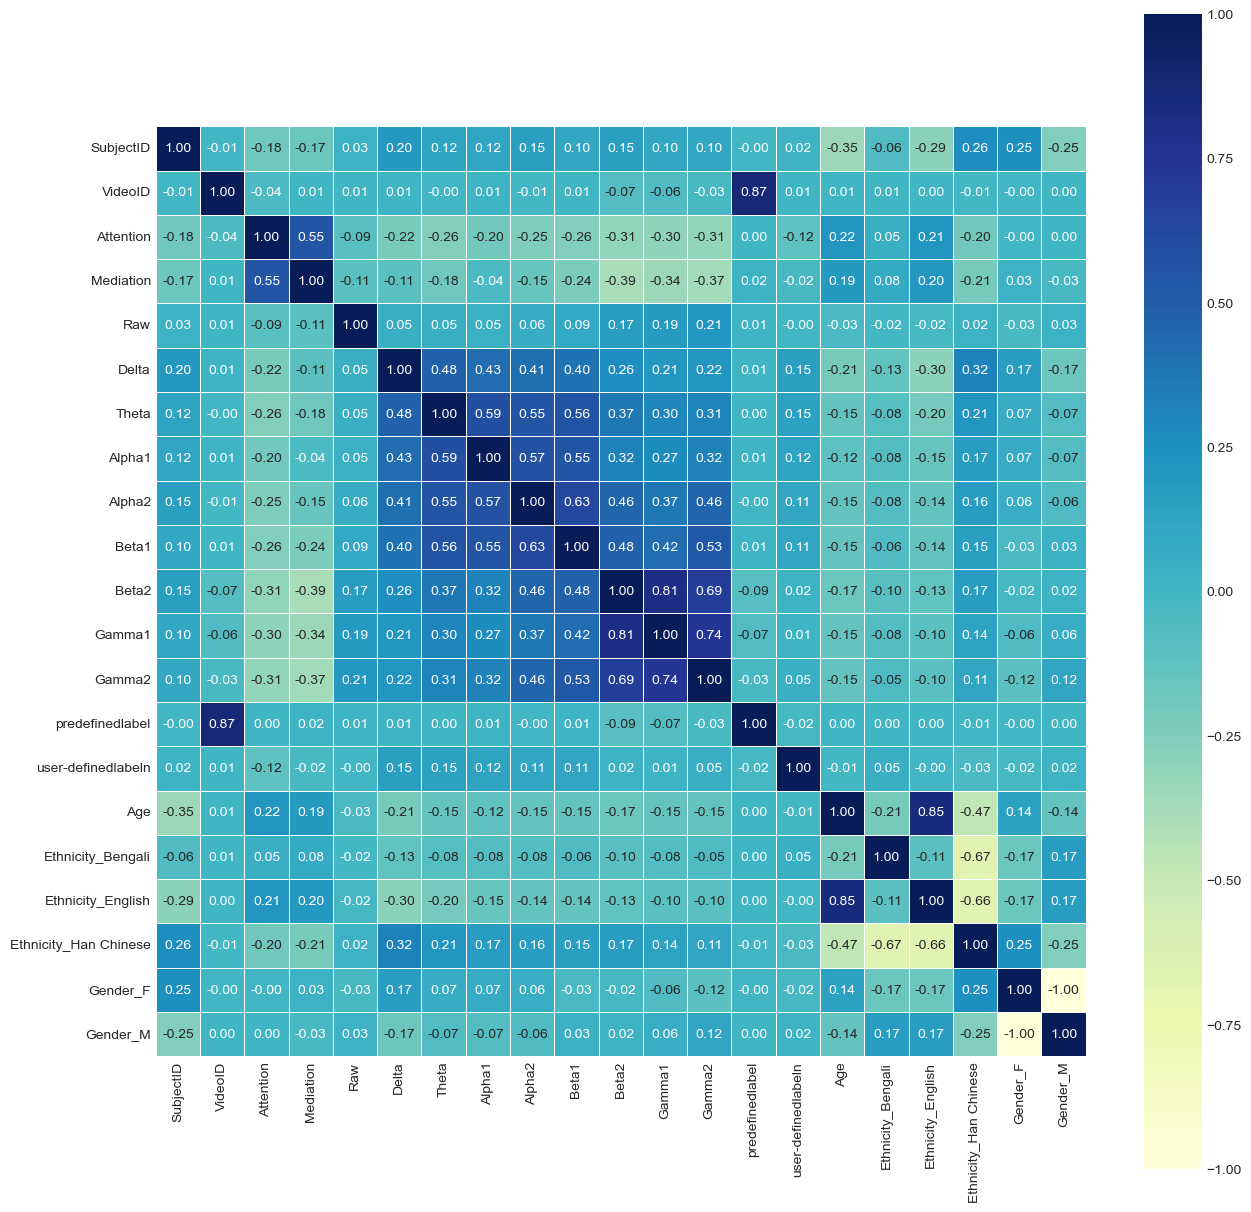

In [284]:
plt.figure(figsize=(15,15))
correlation_matx = merged_data.corr()
sns.heatmap(correlation_matx,square=True,cmap="YlGnBu",annot=True,linewidth=0.5,fmt=".2f");

plt.savefig(r"C:\Users\HP\Notebook files\DA - pandas,numpy,scikit learn\plt generated\correlation-matrix.png")

## Positive Correlated features identified by plotting Scatter plot

 * positive correlations can be concluded through linear relationships

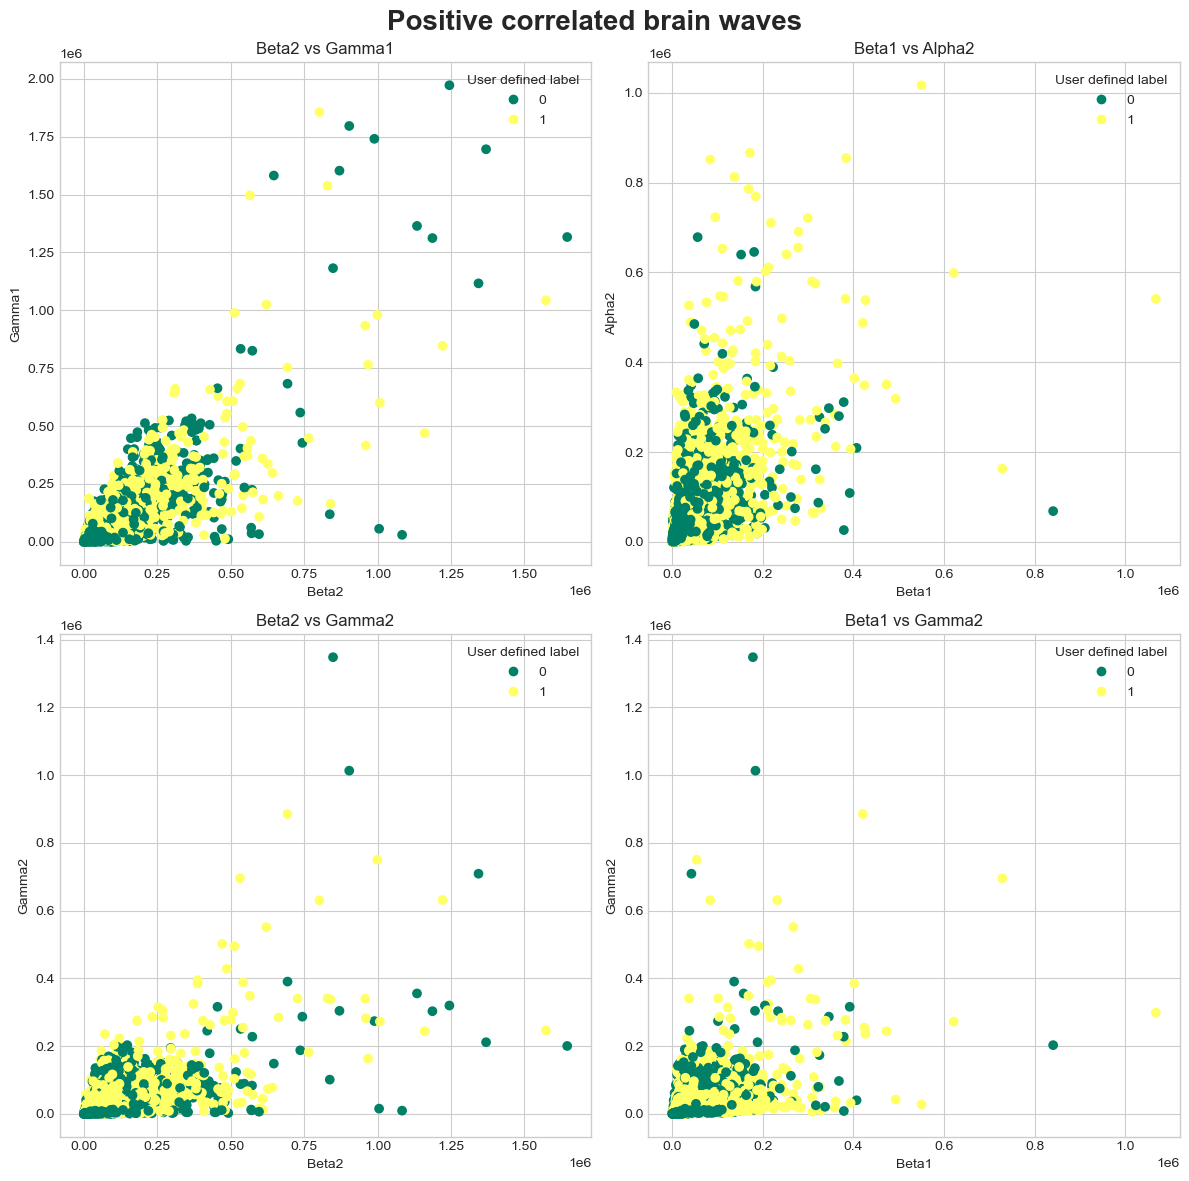

In [31]:
plt.style.use("seaborn-whitegrid")
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows=2,
                                         ncols=2,
                                         figsize=(12,12))
# beta2 vs gamma1
plot0 = ax0.scatter(x=merged_data["Beta2"],
                    y=merged_data["Gamma1"],
                    c=merged_data["user-definedlabeln"],
                    cmap="summer"
                   )

ax0.set(title="Beta2 vs Gamma1",
       xlabel="Beta2",
       ylabel="Gamma1")

ax0.legend(*plot0.legend_elements(),title="User defined label");

#beta1 vs Alpha2
plot1 = ax1.scatter(x=merged_data["Beta1"],
                    y=merged_data["Alpha2"],
                    c=merged_data["user-definedlabeln"],
                    cmap="summer"
                   )

ax1.set(title="Beta1 vs Alpha2",
       xlabel="Beta1",
       ylabel="Alpha2")

ax1.legend(*plot1.legend_elements(),title="User defined label");



# Beta2 vs Gamma2
plot2 = ax2.scatter(x=merged_data["Beta2"],
                    y=merged_data["Gamma2"],
                    c=merged_data["user-definedlabeln"],
                    cmap="summer"
                   )

ax2.set(title="Beta2 vs Gamma2",
       xlabel="Beta2",
       ylabel="Gamma2")

ax2.legend(*plot2.legend_elements(),title="User defined label");

# Beta1 vs Gamma2
plot3 = ax3.scatter(x=merged_data["Beta1"],
                    y=merged_data["Gamma2"],
                    c=merged_data["user-definedlabeln"],
                    cmap="summer"
                   )

ax3.set(title="Beta1 vs Gamma2",
       xlabel="Beta1",
       ylabel="Gamma2")

ax3.legend(*plot3.legend_elements(),title="User defined label");

fig.suptitle("Positive correlated brain waves",fontsize=20,fontweight="bold")
fig.tight_layout()

fig.savefig(r"C:\Users\HP\Notebook files\DA - pandas,numpy,scikit learn\plt generated\positive-correlated-waves.png")

## Negative correlated features

* A negative correlation between two variables means that one variable increases while the other decreases.

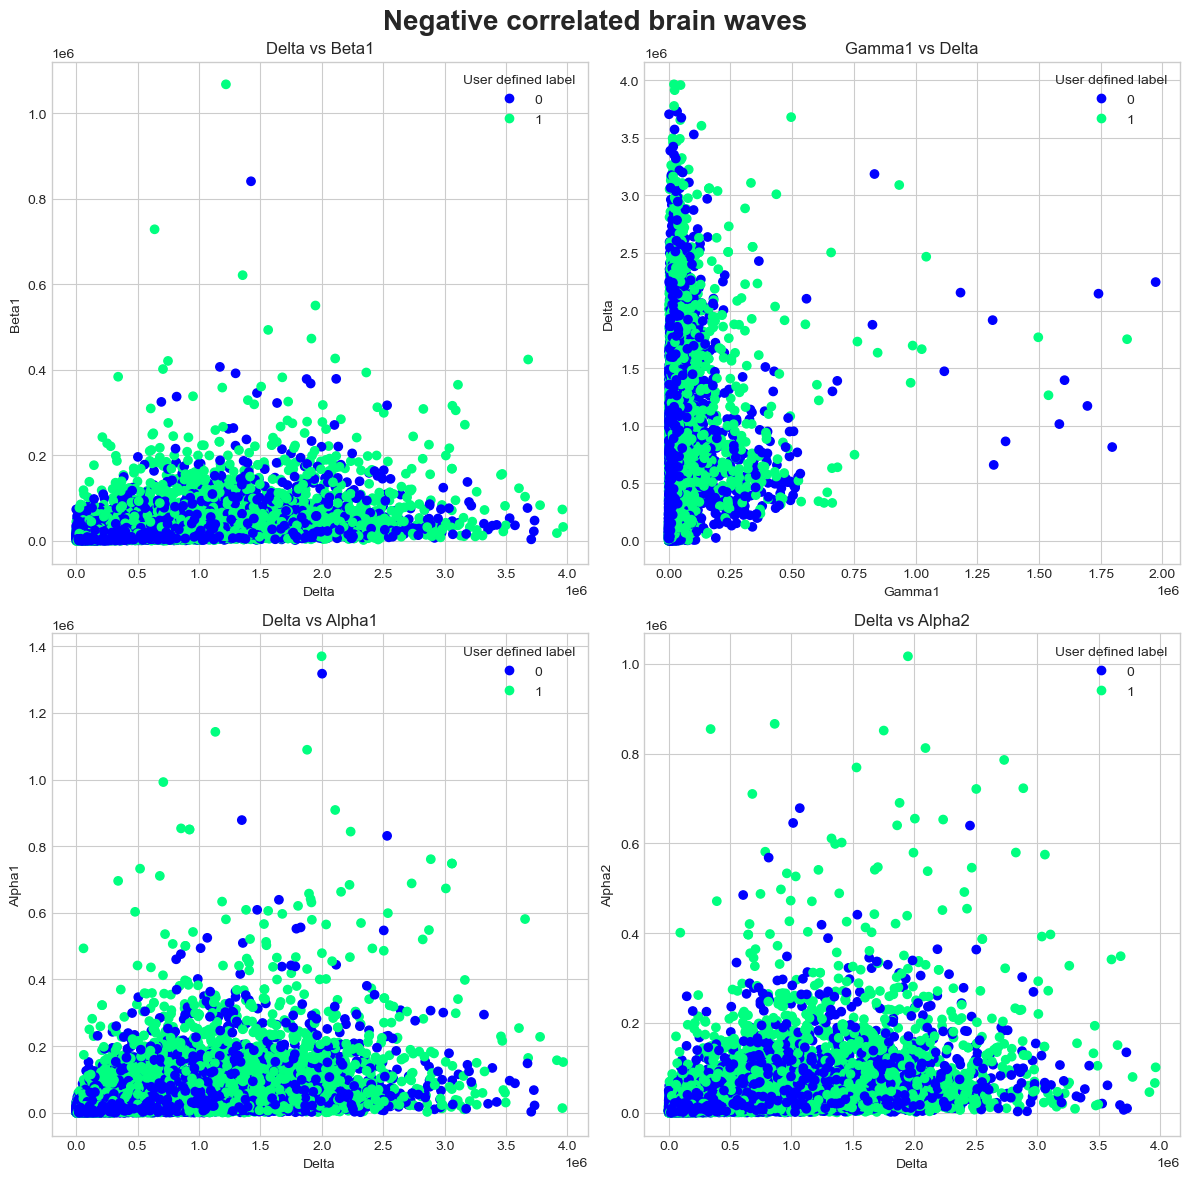

In [32]:
plt.style.use("seaborn-whitegrid")

fig,((ax0,ax1),(ax2,ax3))=plt.subplots(nrows=2,
                                       ncols=2,
                                       figsize=(12,12))

# delta vs beta1
plot0 = ax0.scatter(x=merged_data["Delta"],
                    y=merged_data["Beta1"],
                    c=merged_data["user-definedlabeln"],
                    cmap="winter"
                   )

ax0.set(title="Delta vs Beta1",
       xlabel="Delta",
       ylabel="Beta1")

ax0.legend(*plot0.legend_elements(),title="User defined label");


#gamma vs delta
plot1 = ax1.scatter(x=merged_data["Gamma1"],
                    y=merged_data["Delta"],
                    c=merged_data["user-definedlabeln"],
                    cmap="winter"
                   )

ax1.set(title="Gamma1 vs Delta",
       xlabel="Gamma1",
       ylabel="Delta")

ax1.legend(*plot1.legend_elements(),title="User defined label");

# delta vs alpha1
plot2 = ax2.scatter(x=merged_data["Delta"],
                    y=merged_data["Alpha1"],
                    c=merged_data["user-definedlabeln"],
                    cmap="winter"
                   )

ax2.set(title="Delta vs Alpha1",
       xlabel="Delta",
       ylabel="Alpha1")

ax2.legend(*plot2.legend_elements(),title="User defined label");

# Delta vs Alpha2
plot3 = ax3.scatter(x=merged_data["Delta"],
                    y=merged_data["Alpha2"],
                    c=merged_data["user-definedlabeln"],
                    cmap="winter"
                   )

ax3.set(title="Delta vs Alpha2",
       xlabel="Delta",
       ylabel="Alpha2")

ax3.legend(*plot3.legend_elements(),title="User defined label");


fig.suptitle("Negative correlated brain waves",fontsize=20,fontweight="bold")
fig.tight_layout()

fig.savefig(r"C:\Users\HP\Notebook files\DA - pandas,numpy,scikit learn\plt generated\negative-correlated-waves.png")

In [34]:
!set PATH=/Library/TeX/texbin:$PATH

In [37]:
merged_data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


In [38]:
merged_data["user-definedlabeln"].value_counts()

1.0    6567
0.0    6244
Name: user-definedlabeln, dtype: int64

In [39]:
merged_data["predefinedlabel"].value_counts()

0.0    6662
1.0    6149
Name: predefinedlabel, dtype: int64

In [41]:
merged_data.Age.value_counts()

24    6394
25    3819
28    1314
31    1284
Name: Age, dtype: int64

In [40]:
merged_data["Attention"].value_counts()

0.0     1423
43.0     407
41.0     396
38.0     392
48.0     390
        ... 
93.0      23
3.0       17
94.0      17
97.0      14
96.0       8
Name: Attention, Length: 61, dtype: int64

0         33735.0
1          1439.0
2        201999.0
3         61236.0
4         37102.0
           ...   
12806       709.0
12807    153171.0
12808     40068.0
12809     11444.0
12810     50014.0
Name: Alpha1, Length: 12811, dtype: float64

In [89]:
attention_greater_0

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,...,2598.0,960.0,1.0,0.0,24,0,0,1,1,0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,...,36574.0,10010.0,1.0,0.0,24,0,0,1,1,0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,...,20427.0,2024.0,1.0,0.0,24,0,0,1,1,0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,...,12323.0,1764.0,1.0,0.0,24,0,0,1,1,0


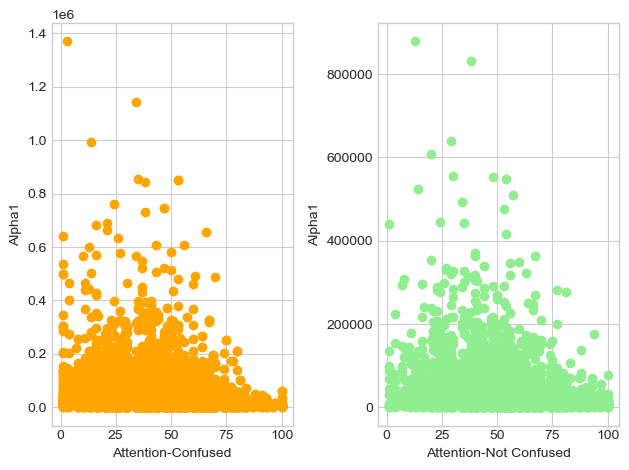

In [103]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)

ax1.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==1],
          attention_greater_0.Alpha1[attention_greater_0["user-definedlabeln"]==1],
          color="orange");
ax2.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==0],
          attention_greater_0.Alpha1[attention_greater_0["user-definedlabeln"]==0],
          color="lightgreen");

ax1.set_xlabel("Attention-Confused")
ax1.set_ylabel("Alpha1");

ax2.set_xlabel("Attention-Not Confused")
ax2.set_ylabel("Alpha1");
fig.tight_layout()

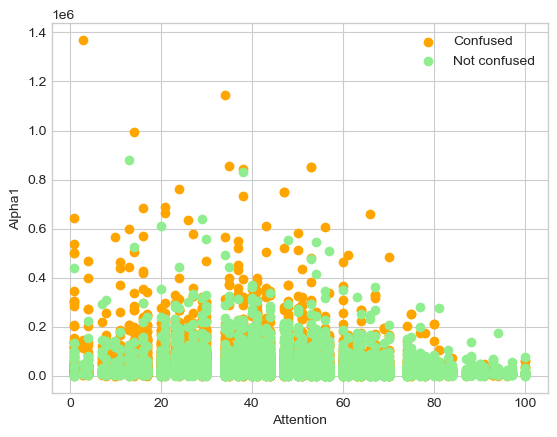

In [101]:
fig,(ax1) = plt.subplots()

ax1.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==1],
          attention_greater_0.Alpha1[attention_greater_0["user-definedlabeln"]==1],
          color="orange");
ax1.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==0],
          attention_greater_0.Alpha1[attention_greater_0["user-definedlabeln"]==0],
          color="lightgreen");

ax1.set_xlabel("Attention")
ax1.set_ylabel("Alpha1");
ax1.legend(["Confused","Not confused"]);
# ax2.set_xlabel("Attention-Not Confused")
# ax2.set_ylabel("Alpha1");

# Confusion related to alpha wave

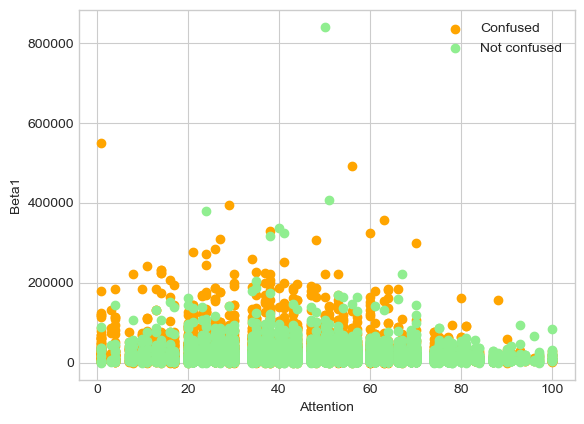

In [107]:
fig,(ax1) = plt.subplots()

ax1.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==1],
          attention_greater_0.Beta1[attention_greater_0["user-definedlabeln"]==1],
          color="orange");
ax1.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==0],
          attention_greater_0.Beta1[attention_greater_0["user-definedlabeln"]==0],
          color="lightgreen");

ax1.set_xlabel("Attention")
ax1.set_ylabel("Beta1");
ax1.legend(["Confused","Not confused"]);
# ax2.set_xlabel("Attention-Not Confused")
# ax2.set_ylabel("Alpha1");

# Confusion related to Beta1 wave

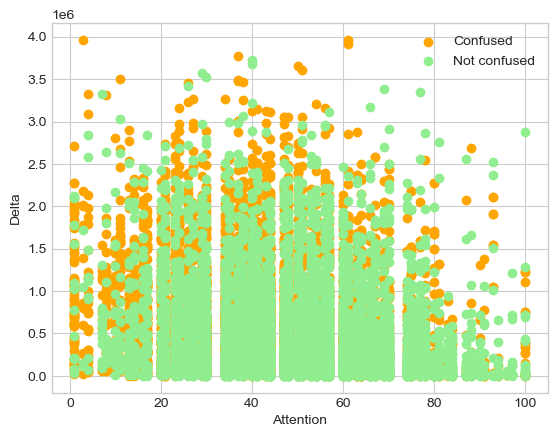

In [105]:
fig,(ax1) = plt.subplots()

ax1.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==1],
          attention_greater_0.Delta[attention_greater_0["user-definedlabeln"]==1],
          color="orange");
ax1.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==0],
          attention_greater_0.Delta[attention_greater_0["user-definedlabeln"]==0],
          color="lightgreen");

ax1.set_xlabel("Attention")
ax1.set_ylabel("Delta");
ax1.legend(["Confused","Not confused"]);
# ax2.set_xlabel("Attention-Not Confused")
# ax2.set_ylabel("Alpha1");

# Confusion related to delta wave

In [64]:
pd.crosstab(merged_data_before.Gender,merged_data_before["user-definedlabeln"])

user-definedlabeln,0.0,1.0
Gender,,
F,1297,1278
M,4947,5289


In [65]:
merged_data_before.Gender.value_counts()

M    10236
F     2575
Name: Gender, dtype: int64

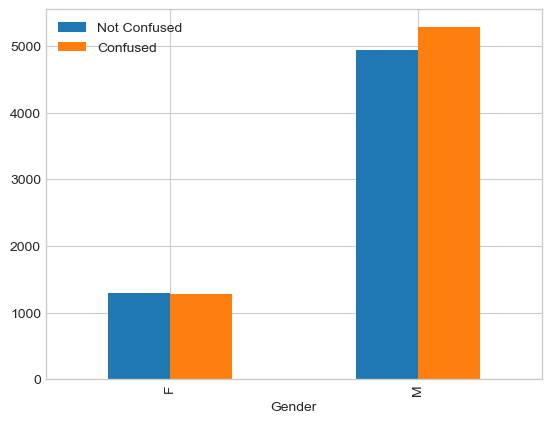

In [71]:
pd.crosstab(merged_data_before.Gender,merged_data_before["user-definedlabeln"]).plot(kind="bar")
plt.legend(["Not Confused","Confused"]);

(0.0, 110.0)

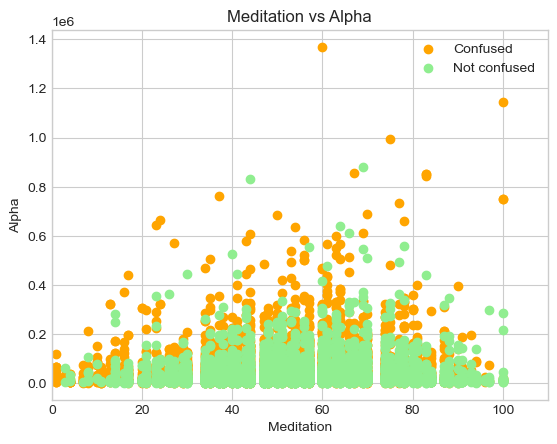

In [119]:
fig,(ax1) = plt.subplots()

ax1.scatter(attention_greater_0.Mediation[attention_greater_0["user-definedlabeln"]==1],
          attention_greater_0.Alpha1[attention_greater_0["user-definedlabeln"]==1],
          color="orange");
ax1.scatter(attention_greater_0.Mediation[attention_greater_0["user-definedlabeln"]==0],
          attention_greater_0.Alpha1[attention_greater_0["user-definedlabeln"]==0],
          color="lightgreen");

ax1.set_title("Meditation vs Alpha")
ax1.set_xlabel("Meditation")
ax1.set_ylabel("Alpha");
ax1.legend(["Confused","Not confused"]);
ax1.set_xlim((0,110))
# ax2.set_xlabel("Attention-Not Confused")
# ax2.set_ylabel("Alpha1");

# Confusion related to delta wave

### Attention vs userdefined label

In [135]:
pd.crosstab(attention_greater_0["user-definedlabeln"],attention_greater_0["Attention"])

Attention,1.0,3.0,4.0,7.0,8.0,10.0,11.0,13.0,14.0,16.0,...,84.0,87.0,88.0,90.0,91.0,93.0,94.0,96.0,97.0,100.0
user-definedlabeln,,,,,,,,,,,,,,,,,,,,,
0.0,13,4,9,13,16,18,17,28,29,32,...,36,38,30,27,20,9,10,5,11,19
1.0,75,13,33,16,38,44,57,56,90,79,...,20,9,10,7,16,14,7,3,3,23


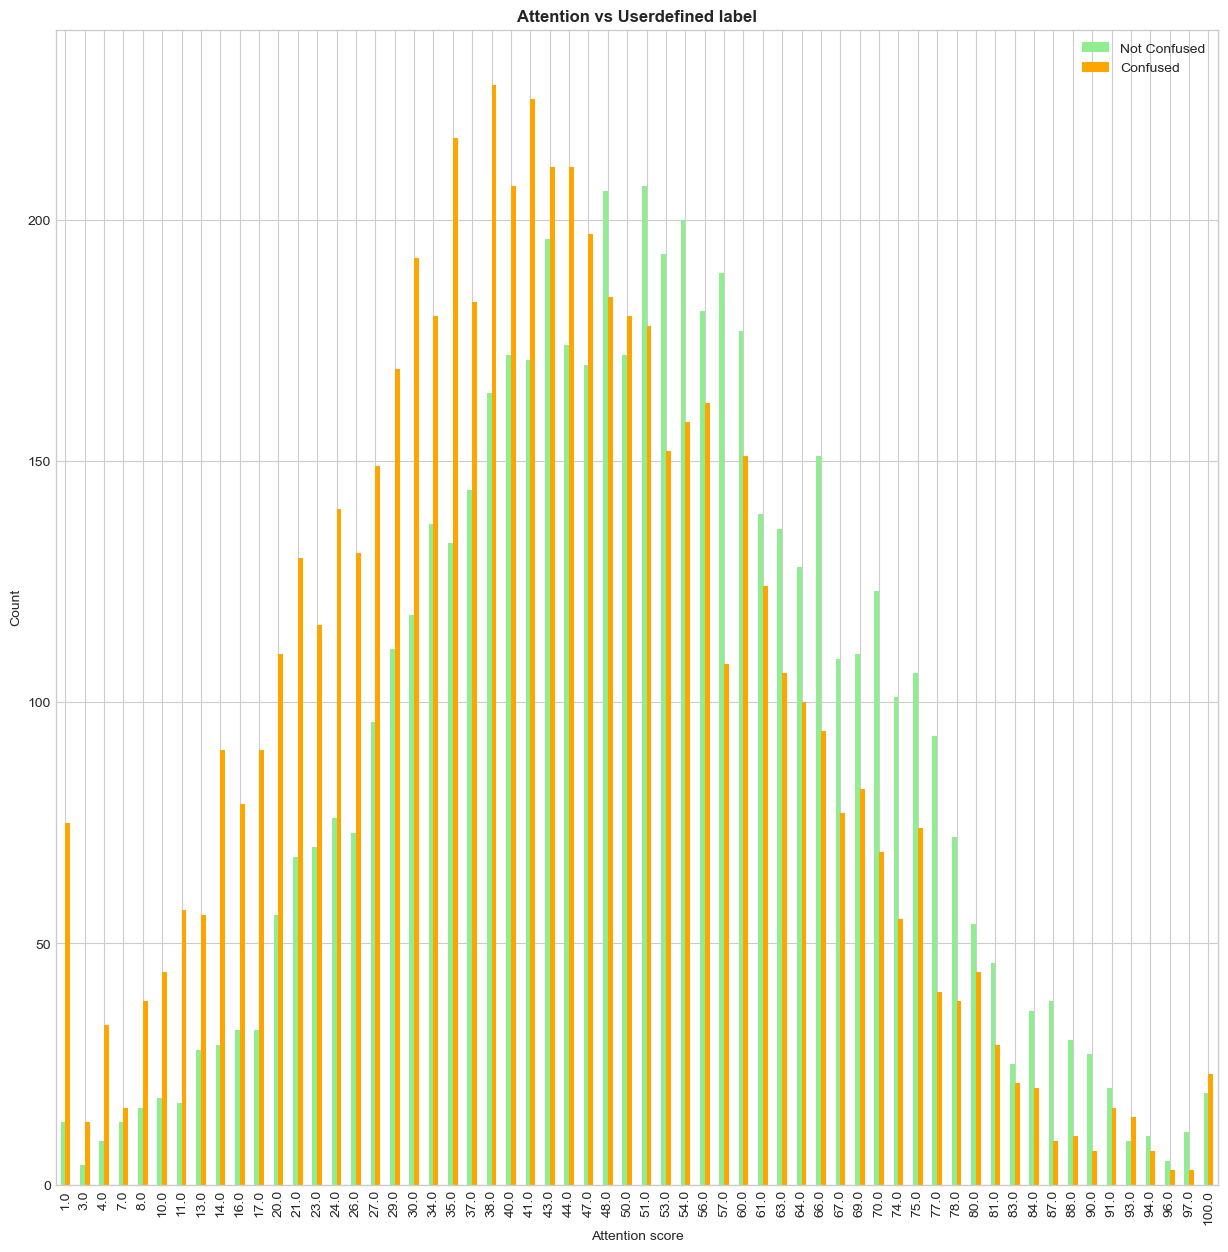

In [168]:
pd.crosstab(attention_greater_0["Attention"],attention_greater_0["user-definedlabeln"]).plot(kind="bar",figsize=(15,15),color=["lightgreen","orange"])
plt.legend(["Not Confused","Confused"]);
plt.title("Attention vs Userdefined label",fontweight="bold");
plt.xlabel("Attention score")
plt.ylabel("Count");
plt.savefig(r"C:\Users\HP\Notebook files\IP\attention-vs-label.png")

In [147]:
meditation_greater_0 = merged_data[merged_data["Mediation"]>0.0]
meditation_greater_0.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


In [150]:
meditation_greater_0[meditation_greater_0["Mediation"]==0.0]

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M


In [152]:
pd.crosstab(meditation_greater_0["user-definedlabeln"],meditation_greater_0["Mediation"])

Mediation,1.0,3.0,4.0,7.0,8.0,10.0,11.0,13.0,14.0,16.0,...,84.0,87.0,88.0,90.0,91.0,93.0,94.0,96.0,97.0,100.0
user-definedlabeln,,,,,,,,,,,,,,,,,,,,,
0.0,0,2,3,1,5,3,2,5,24,9,...,43,28,23,15,20,10,13,4,7,15
1.0,22,4,11,12,11,15,19,20,23,37,...,35,32,21,24,5,9,6,4,2,8


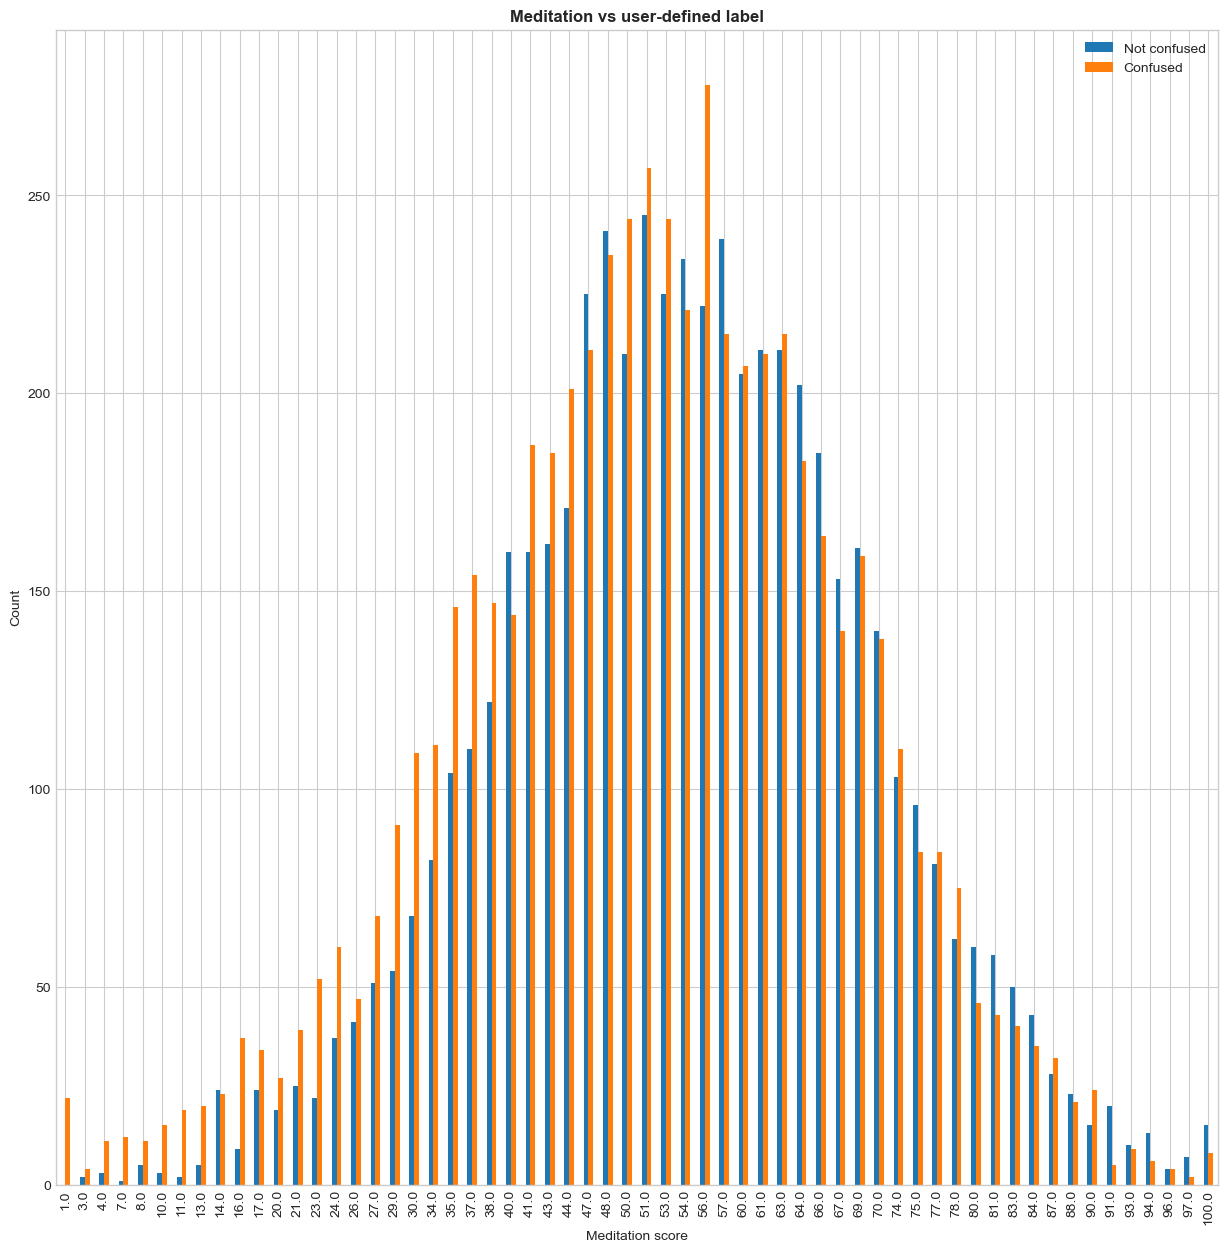

In [164]:
pd.crosstab(meditation_greater_0["Mediation"],meditation_greater_0["user-definedlabeln"]).plot(kind="bar",
                                                                                              figsize=(15,15),
                                                                                              );
plt.legend(["Not confused","Confused"]);
plt.title("Meditation vs user-defined label",fontweight="bold")
plt.xlabel("Meditation score")
plt.ylabel("Count");
plt.savefig(r"C:\Users\HP\Notebook files\IP\meditation-vs-label.png")

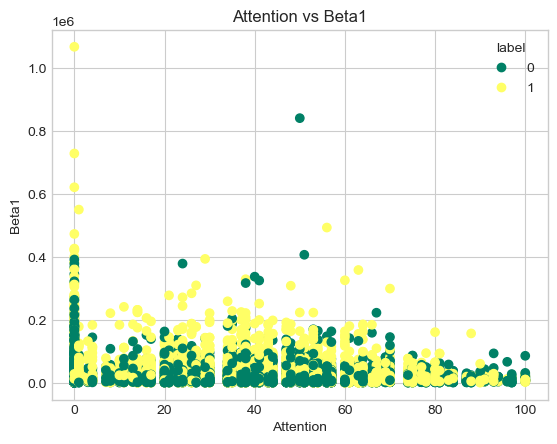

In [279]:
plot = plt.scatter(merged_data["Attention"],
            merged_data["Beta1"],
           c=merged_data["user-definedlabeln"],
           cmap = "summer"
           )
plt.legend(*plot.legend_elements(),title="label");
plt.xlabel("Attention")
plt.ylabel("Beta1")
plt.title("Attention vs Beta1");
#plt.legend(["Not Confused","Confused"])
plt.savefig(r"C:\Users\HP\Notebook files\IP\attention-vs-beta1.png")

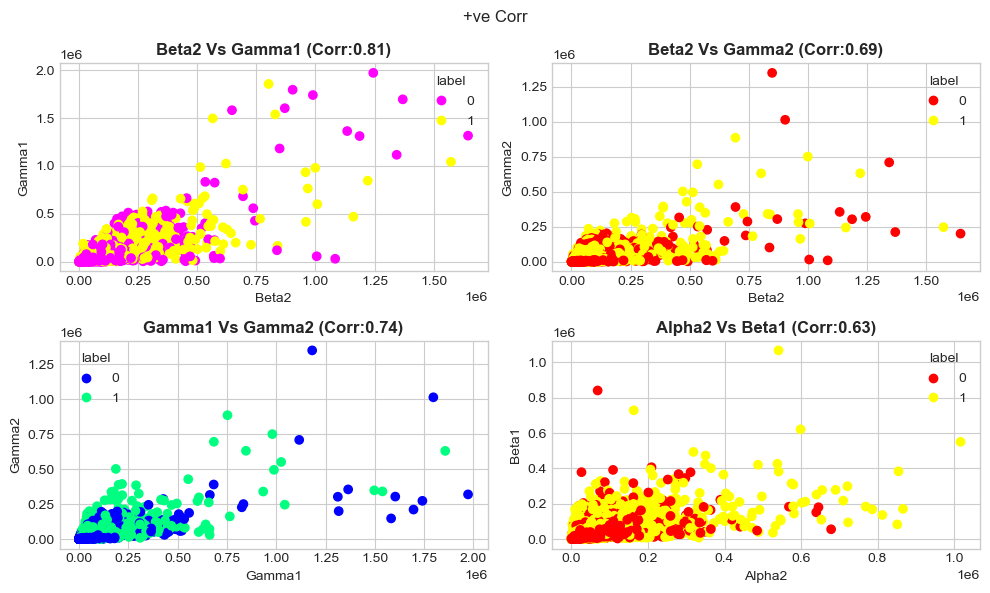

In [309]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,6))
plot1 = ax1.scatter(merged_data["Beta2"],merged_data["Gamma1"],c=merged_data["user-definedlabeln"],cmap="spring");
plot2 = ax2.scatter(merged_data["Beta2"],merged_data["Gamma2"],c=merged_data["user-definedlabeln"],cmap="autumn");
plot3 = ax3.scatter(merged_data["Gamma1"],merged_data["Gamma2"],c=merged_data["user-definedlabeln"],cmap="winter");
plot4 = ax4.scatter(merged_data["Alpha2"],merged_data["Beta1"],c=merged_data["user-definedlabeln"],cmap="autumn");

ax1.legend(*plot1.legend_elements(),title="label");
ax1.set_title("Beta2 Vs Gamma1 (Corr:0.81)",fontdict={"fontweight":"bold"})
ax1.set(xlabel="Beta2",ylabel="Gamma1")
ax2.legend(*plot2.legend_elements(),title="label");
ax2.set_title("Beta2 Vs Gamma2 (Corr:0.69)",fontdict={"fontweight":"bold"})
ax2.set(xlabel="Beta2",ylabel="Gamma2");
ax3.legend(*plot3.legend_elements(),title="label");
ax3.set_title("Gamma1 Vs Gamma2 (Corr:0.74)",fontdict={"fontweight":"bold"})
ax3.set(xlabel="Gamma1",ylabel="Gamma2")
ax4.legend(*plot4.legend_elements(),title="label");
ax4.set_title("Alpha2 Vs Beta1 (Corr:0.63)",fontdict={"fontweight":"bold"})
ax4.set(xlabel="Alpha2",ylabel="Beta1")

fig.suptitle("+ve Corr",fontdict={"weight":"bold"})
fig.tight_layout()
fig.savefig(r"C:\Users\HP\Notebook files\IP\positive-corr.png")

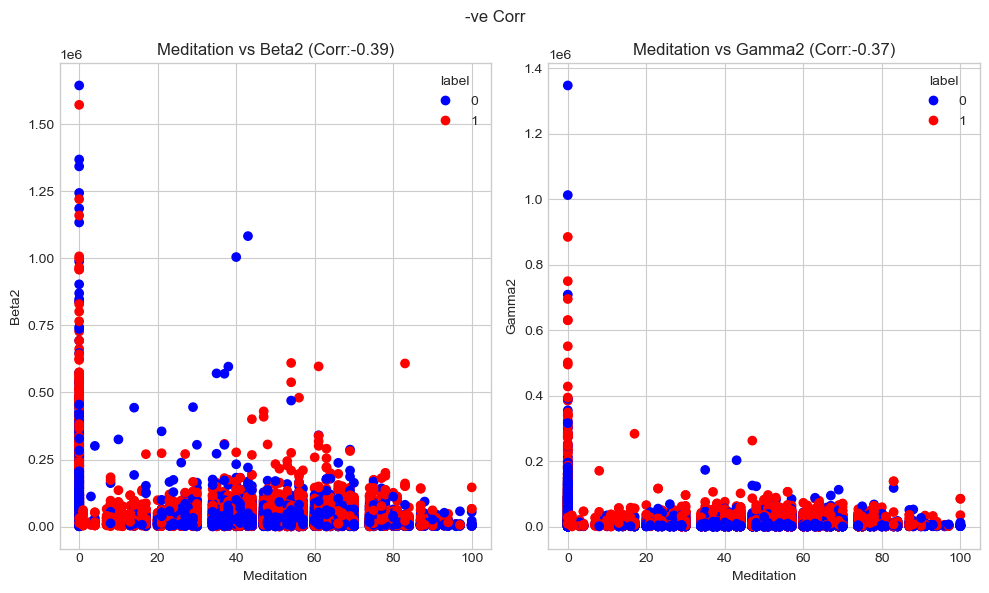

In [328]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

plot1 = ax1.scatter(merged_data["Mediation"],merged_data["Beta2"],
                   c=merged_data["user-definedlabeln"],
                   cmap="bwr")

plot2 = ax2.scatter(merged_data["Mediation"],merged_data["Gamma2"],
                  c=merged_data["user-definedlabeln"],
                  cmap="bwr")

ax1.legend(*plot1.legend_elements(),title="label")
ax1.set(title="Meditation vs Beta2 (Corr:-0.39)",xlabel="Meditation",ylabel="Beta2")

ax2.legend(*plot2.legend_elements(),title="label")
ax2.set(title="Meditation vs Gamma2 (Corr:-0.37)",xlabel="Meditation",ylabel="Gamma2");

fig.suptitle("-ve Corr")
fig.savefig(r"C:\Users\HP\Notebook files\IP\negative-corr.png")
fig.tight_layout()